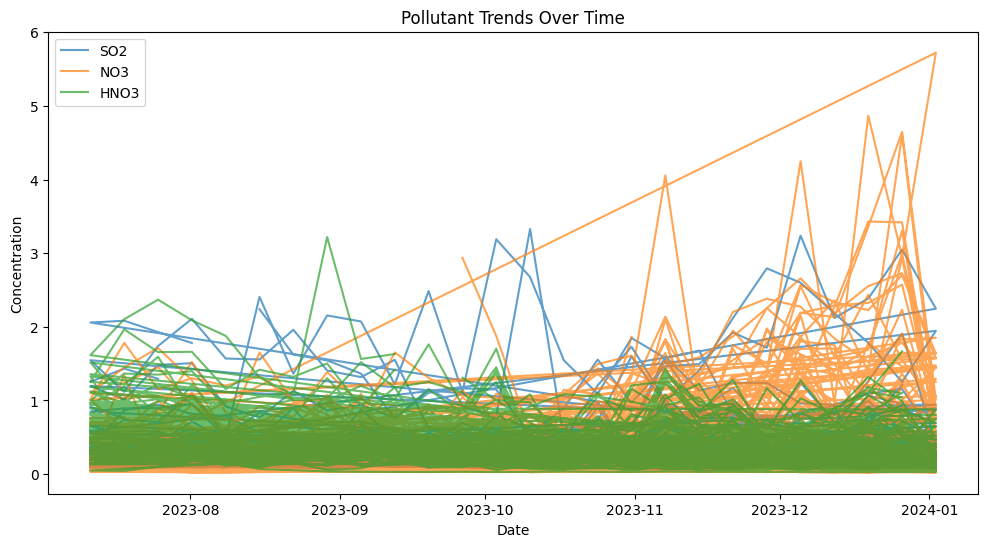

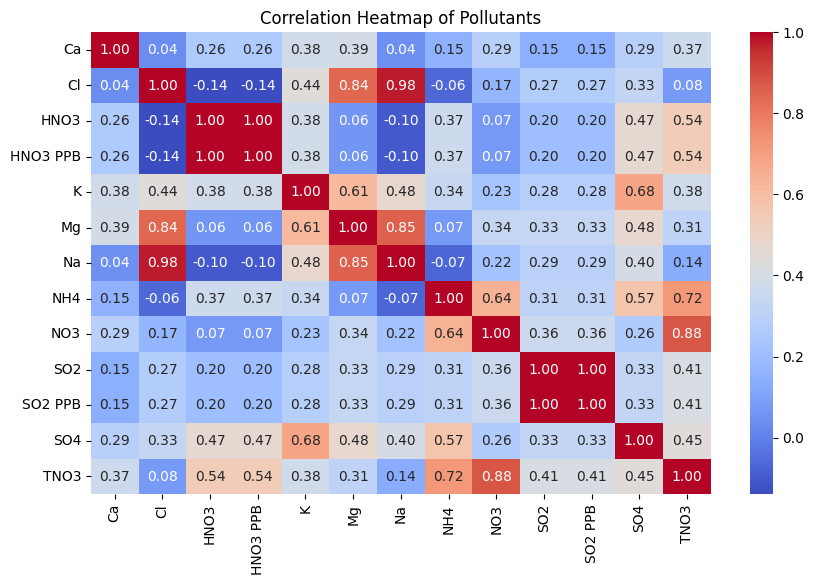

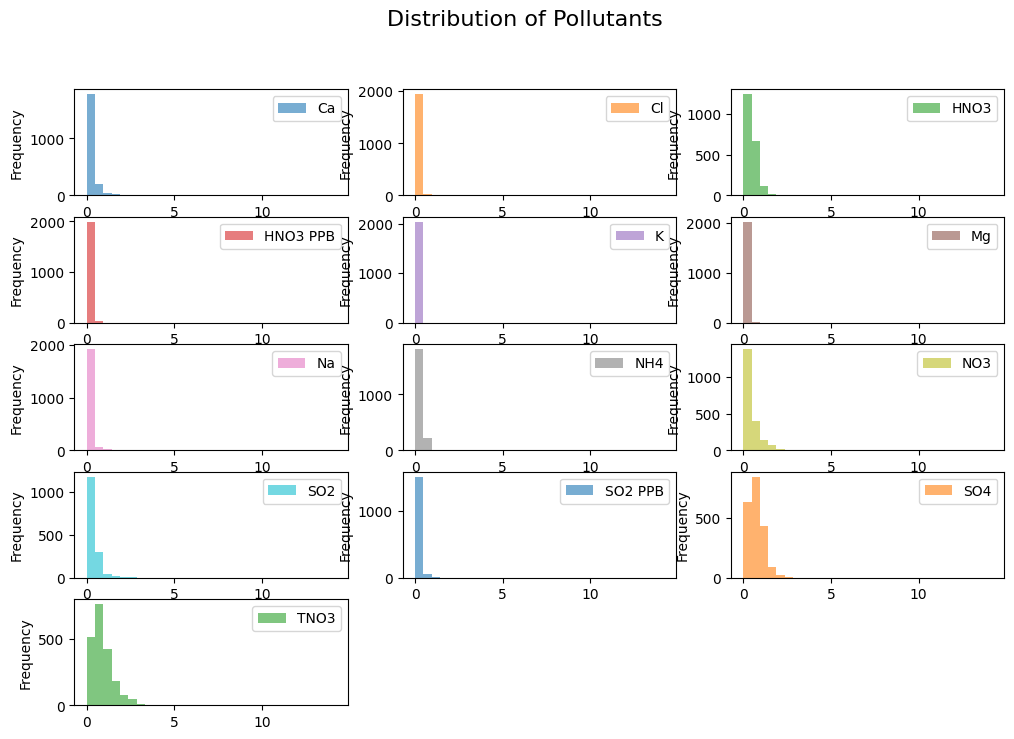

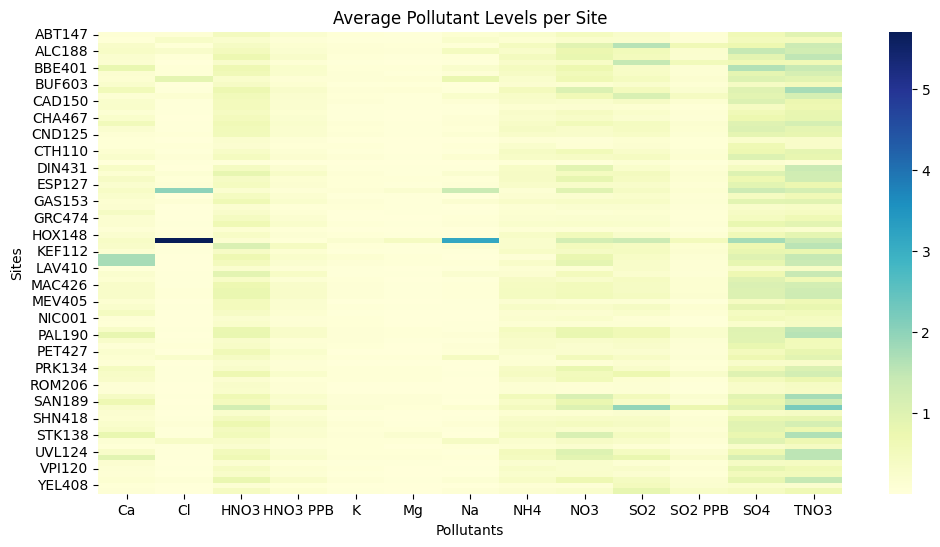

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "air_quality_dataset.csv"   
df = pd.read_csv(file_path)


numeric_cols = ['Ca', 'Cl', 'HNO3', 'HNO3 PPB', 'K', 'Mg', 'Na', 'NH4', 'NO3',
                'SO2', 'SO2 PPB', 'SO4', 'TNO3']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df['DATEOFF'] = pd.to_datetime(df['DATEOFF'], errors='coerce')


plt.figure(figsize=(12, 6))
for pollutant in ['SO2', 'NO3', 'HNO3']:
    plt.plot(df['DATEOFF'], df[pollutant], label=pollutant, alpha=0.7)
plt.legend()
plt.title("Pollutant Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.show()


plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Pollutants")
plt.show()

df[numeric_cols].plot(
    kind='hist', bins=30, alpha=0.6, 
    figsize=(12, 8), subplots=True, layout=(5,3), sharex=False
)
plt.suptitle("Distribution of Pollutants", fontsize=16)
plt.show()


site_means = df.groupby("SITE_ID")[numeric_cols].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(site_means, cmap="YlGnBu")
plt.title("Average Pollutant Levels per Site")
plt.xlabel("Pollutants")
plt.ylabel("Sites")
plt.show()